# CS 470 Homework 1
**By Niki Vasan**

#### Import Data

In [839]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# hello

In [763]:
data = pd.read_csv("grades.csv")
data.head()

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 09,Quiz 10,Quiz 11,Quiz 12,Quiz Adjustment,Drop Lowest Quiz 1,Drop Lowest Quiz 2,Final Exam,Total Score,Letter Grade
0,F18,457364,Youyang,8,32.0,40.0,34.0,34.0,42.0,150.0,...,36.0,40.0,47.0,13.0,NaN,-13,-22.0,123.0,841.0,B
1,F18,950536,Tait,2,35.0,40.0,34.0,32.0,40.0,150.0,...,15.0,39.0,46.0,46.0,NaN,0,-15.0,99.0,773.5,C+
2,F18,524131,Hafeez,1,39.0,40.0,42.0,29.0,42.0,150.0,...,27.0,41.0,40.0,8.0,NaN,-8,-19.0,117.0,834.0,B
3,F18,791499,Madhura,4,38.0,40.0,37.0,34.0,40.0,NaN,...,18.0,23.0,30.0,34.0,NaN,-18,-23.0,117.0,696.0,D+
4,F18,273342,Jeeyong,1,38.0,40.0,42.0,38.0,42.0,150.0,...,34.0,38.0,50.0,47.0,NaN,-34,-38.0,132.0,956.0,A


### Task 2 - Missing Values

In [764]:
data.isna().sum()

Semester                0
Student ID              0
Name                    0
Section                 0
Homework 1             18
Homework 2             17
Homework 3             26
Homework 4             30
Homework 5             43
Peer Evaluations       40
Bonus                 769
Quiz 01                17
Quiz 02                26
Quiz 03                17
Quiz 04                32
Quiz 05                39
Quiz 06                50
Quiz 07                51
Quiz 08                48
Quiz 09                49
Quiz 10                53
Quiz 11                83
Quiz 12                79
Quiz Adjustment       774
Drop Lowest Quiz 1      0
Drop Lowest Quiz 2      0
Final Exam             41
Total Score             0
Letter Grade            0
dtype: int64

In [765]:
data_time = data[['Semester', 'Section']]
data_time = data_time.sort_values(by=['Semester', 'Section'])

In [766]:
data.groupby(['Semester', 'Section']).size()

Semester  Section
F16       0          27
          1          26
          2          26
          3          22
          4          22
          6          16
          7          21
          8          13
          9          23
F17       1          12
          2          22
          3          21
          4          27
          5          22
          6          14
          7          22
          8          18
          9          24
F18       1           9
          2          13
          3          21
          4          25
          5          18
          6          23
          7          23
          8          12
          9           8
S17       0          26
          1          22
          2          23
          3          17
          4          11
          5           9
S18       1          26
          2          24
          3          22
          4          26
          5          27
          6          21
dtype: int64

### Task 3 - Re-encoding

In [767]:
# Re-encode Semesters
data['Semester'] = data['Semester'].str.replace('F16', '1')
data['Semester'] = data['Semester'].str.replace('S17', '2')
data['Semester'] = data['Semester'].str.replace('F17', '3')
data['Semester'] = data['Semester'].str.replace('S18', '4')
data['Semester'] = data['Semester'].str.replace('F18', '5')

data.sort_values(by=['Semester'], inplace=True)
data['Semester'] = data['Semester'].astype("int")

In [768]:
# Re-encode Section 1 (F16)
mapping1 = {0:0.5, 1:1.5, 2:2.5, 3:3.5, 4:4.5, 6:6.5, 7:7.5, 8:8.5, 9:9.5}
data[data['Semester'] == 1] = data[data['Semester'] == 1].assign(Section = data[data['Semester'] == 1].Section.map(mapping1))
mapping2 = {0.5:1, 1.5:2, 2.5:3, 3.5:4, 4.5:5, 6.5:6, 7.5:7, 8.5:8, 9.5:9}
data[data['Semester'] == 1] = data[data['Semester'] == 1].assign(Section = data[data['Semester'] == 1].Section.map(mapping2))
print(data[data['Semester'] == 1]['Section'].unique(), len(data[data['Semester'] == 1]['Section']))


[8. 3. 4. 9. 6. 1. 2. 5. 7.] 196


In [769]:
# Re-encode Section 2 (S17)
data.loc[data['Semester']== 2,'Section'] = data['Section'] + 1
data[data['Semester'] == 2]['Section'].unique()

array([5., 4., 1., 2., 6., 3.])

In [770]:
data.groupby(['Semester', 'Section']).size()

Semester  Section
1         1.0        27
          2.0        26
          3.0        26
          4.0        22
          5.0        22
          6.0        16
          7.0        21
          8.0        13
          9.0        23
2         1.0        26
          2.0        22
          3.0        23
          4.0        17
          5.0        11
          6.0         9
3         1.0        12
          2.0        22
          3.0        21
          4.0        27
          5.0        22
          6.0        14
          7.0        22
          8.0        18
          9.0        24
4         1.0        26
          2.0        24
          3.0        22
          4.0        26
          5.0        27
          6.0        21
5         1.0         9
          2.0        13
          3.0        21
          4.0        25
          5.0        18
          6.0        23
          7.0        23
          8.0        12
          9.0         8
dtype: int64

### Task 4 - Scaling and Z Scoring

Attributes representing a score: Homeworks 1-5, Peer Evaluations, Quiz 1-12, Final Exam, Total Score

##### 1. Min-Max Normalization

In [771]:
from sklearn.preprocessing import MinMaxScaler

In [772]:
df = data.iloc[:,[4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,26,27]]

In [773]:
scaler = MinMaxScaler([0,100])
data_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
col_names = [col + ' MM' for col in data_norm.columns]
data_norm.columns = col_names
data_copy = pd.concat([data, data_norm], axis=1)
data_copy.head()

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 05 MM,Quiz 06 MM,Quiz 07 MM,Quiz 08 MM,Quiz 09 MM,Quiz 10 MM,Quiz 11 MM,Quiz 12 MM,Final Exam MM,Total Score MM
0,5,457364,Youyang,8.0,32.0,40.0,34.0,34.0,42.0,150.0,...,86.0,68.750000,74.0,82.0,80.0,60.0,86.0,100.0,78.048780,91.0
1,5,950536,Tait,2.0,35.0,40.0,34.0,32.0,40.0,150.0,...,76.0,41.666667,4.0,48.0,32.0,32.0,52.0,86.0,36.585366,72.5
2,5,524131,Hafeez,1.0,39.0,40.0,42.0,29.0,42.0,150.0,...,76.0,37.500000,30.0,74.0,42.0,40.0,72.0,96.0,70.731707,79.3
3,5,791499,Madhura,4.0,38.0,40.0,37.0,34.0,40.0,NaN,...,98.0,100.000000,94.0,98.0,100.0,64.0,86.0,100.0,87.804878,98.2
4,5,273342,Jeeyong,1.0,38.0,40.0,42.0,38.0,42.0,150.0,...,16.0,0.000000,0.0,12.0,48.0,0.0,14.0,4.0,19.512195,48.7


##### Z-Score Method

In [774]:
from sklearn.preprocessing import StandardScaler

In [775]:
df = data.iloc[:,[4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,26,27]]

In [776]:
scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
col_names = [col + ' ZS' for col in data_norm.columns]
data_norm.columns = col_names
data_copy2 = pd.concat([data_copy, data_norm], axis=1)
data_copy2

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 05 ZS,Quiz 06 ZS,Quiz 07 ZS,Quiz 08 ZS,Quiz 09 ZS,Quiz 10 ZS,Quiz 11 ZS,Quiz 12 ZS,Final Exam ZS,Total Score ZS
0,5,457364,Youyang,8.0,32.0,40.0,34.0,34.0,42.0,150.0,...,0.543537,0.075526,0.201027,0.585138,0.787640,-0.091936,0.351649,0.859624,0.496245,0.597858
1,5,950536,Tait,2.0,35.0,40.0,34.0,32.0,40.0,150.0,...,0.116570,-1.038341,-2.487894,-0.613691,-1.159385,-1.310677,-0.793950,0.402978,-1.925731,-0.398167
2,5,524131,Hafeez,1.0,39.0,40.0,42.0,29.0,42.0,150.0,...,0.116570,-1.209705,-1.489152,0.303061,-0.753755,-0.962465,-0.120068,0.729154,0.068838,-0.032060
3,5,791499,Madhura,4.0,38.0,40.0,37.0,34.0,40.0,NaN,...,1.055896,1.360757,0.969290,1.149293,1.598901,0.082170,0.351649,0.859624,1.066122,0.985500
4,5,273342,Jeeyong,1.0,38.0,40.0,42.0,38.0,42.0,150.0,...,-2.445227,-2.751982,-2.641546,-1.883039,-0.510377,-2.703524,-2.074326,-2.271666,-2.923016,-1.679540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1,707336,Marcela,5.0,43.0,43.0,40.0,37.0,41.0,150.0,...,0.970503,0.161208,0.892464,0.303061,0.057506,0.865647,0.823366,0.076802,0.923653,0.694769
780,1,593244,Hyungseok,4.0,34.0,38.0,42.0,43.0,44.0,150.0,...,-0.225003,0.075526,-0.567236,NaN,-1.402764,-0.527200,0.823366,NaN,-1.070916,-0.441238
781,1,578133,Kartick,4.0,40.0,41.0,44.0,44.0,43.0,150.0,...,0.628930,0.675301,0.277853,NaN,-0.104746,0.604488,0.823366,0.859624,0.923653,0.667849
782,1,887441,Madhavshree,2.0,34.0,43.0,42.0,37.0,42.0,150.0,...,0.970503,1.360757,1.199769,0.514619,-0.104746,1.213859,0.553814,0.859624,0.638715,0.727072


##### Z-Score Method by Semester

In [777]:
df2 = data.iloc[:,[0,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,26,27]]

In [778]:
z_score = lambda x: (x - x.mean()) / x.std(ddof=0)
for col in df2.columns[1:]: 
    new_col = col + ' ZSG'
    df2.insert(len(df2.loc[0]), new_col, df2.groupby(['Semester'])[col].transform(z_score))

In [779]:
df2 = df2.filter(regex=('ZSG$'))
df2.columns
data_copy3 = pd.concat([data_copy2, df2], axis=1)
data_copy3.columns
data_copy3.head()

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 05 ZSG,Quiz 06 ZSG,Quiz 07 ZSG,Quiz 08 ZSG,Quiz 09 ZSG,Quiz 10 ZSG,Quiz 11 ZSG,Quiz 12 ZSG,Final Exam ZSG,Total Score ZSG
0,5,457364,Youyang,8.0,32.0,40.0,34.0,34.0,42.0,150.0,...,0.346892,-1.178957,-0.498174,0.085236,0.789924,0.552085,0.426165,-1.338194,0.436761,0.158432
1,5,950536,Tait,2.0,35.0,40.0,34.0,32.0,40.0,150.0,...,NaN,-0.561201,-0.023982,-0.059009,-1.314685,0.450929,0.364840,0.795895,-0.746983,-0.204316
2,5,524131,Hafeez,1.0,39.0,40.0,42.0,29.0,42.0,150.0,...,0.859387,-0.384699,-0.577206,-1.140846,-0.112051,0.653241,-0.003111,-1.661541,0.140825,0.120813
3,5,791499,Madhura,4.0,38.0,40.0,37.0,34.0,40.0,NaN,...,0.090645,0.850813,0.371178,0.229481,-1.014026,-1.167571,-0.616362,0.019863,0.140825,-0.620804
4,5,273342,Jeeyong,1.0,38.0,40.0,42.0,38.0,42.0,150.0,...,0.261477,1.292067,0.845370,0.950705,0.589485,0.349773,0.610140,0.860564,0.880665,0.776447


### Task 5 - Summary Statistics

In [780]:
d3 = data_copy3
cols = pd.Series(d3.columns)
cols = cols.loc[cols.str.startswith(('Homework', 'Quiz', 'Peer', 'Final Exam', 'Total Score'),na=False)]
cols = cols.drop(23) # remove Quiz Adjustment
d3 = d3[cols]
summary = round(d3.describe().loc[['min', '25%', '50%', '75%', 'max', 'mean', 'std']],2) # summary table for all 80 attributes
summary.iloc[:,:20] # summary for original (unscaled) features

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,Quiz 01,Quiz 02,Quiz 03,Quiz 04,Quiz 05,Quiz 06,Quiz 07,Quiz 08,Quiz 09,Quiz 10,Quiz 11,Quiz 12,Final Exam,Total Score
min,0.00,0.00,-7.00,-3.00,0.00,1.00,5.00,0.00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00
25%,37.00,37.00,36.00,37.00,40.00,150.00,30.00,39.00,28.00,39.00,30.00,26.00,25.00,23.00,21.00,23.00,31.00,28.00,99.00,738.75
50%,40.00,40.00,40.00,40.00,42.00,150.00,43.00,46.00,37.00,45.00,40.00,37.00,37.00,36.00,30.00,32.00,44.00,43.00,114.00,852.50
75%,42.00,41.00,42.00,42.00,42.00,150.00,49.00,50.00,42.00,48.00,46.00,43.00,46.00,44.00,40.00,41.00,50.00,50.00,126.00,926.00
max,44.00,44.00,44.00,44.00,44.00,150.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,147.00,1000.00
mean,37.78,37.98,37.47,37.99,40.10,146.59,38.65,42.77,34.32,41.82,36.63,34.12,34.38,32.70,30.29,31.06,37.78,36.82,109.55,798.95
std,7.25,6.33,6.90,6.75,6.36,16.19,11.31,9.91,10.80,8.49,11.72,11.68,13.03,14.19,12.33,11.50,14.85,15.34,21.07,185.86


In [781]:
sum_og = summary.iloc[:,:20]
sum_og.iloc[:,10:]

,Quiz 05,Quiz 06,Quiz 07,Quiz 08,Quiz 09,Quiz 10,Quiz 11,Quiz 12,Final Exam,Total Score
min,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00
25%,30.00,26.00,25.00,23.00,21.00,23.00,31.00,28.00,99.00,738.75
50%,40.00,37.00,37.00,36.00,30.00,32.00,44.00,43.00,114.00,852.50
75%,46.00,43.00,46.00,44.00,40.00,41.00,50.00,50.00,126.00,926.00
max,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,147.00,1000.00
mean,36.63,34.12,34.38,32.70,30.29,31.06,37.78,36.82,109.55,798.95
std,11.72,11.68,13.03,14.19,12.33,11.50,14.85,15.34,21.07,185.86


### Task 6 - Plots

#### Boxplots

Below are three different boxplots representing the distribution of the first, third and fifth homeworks.

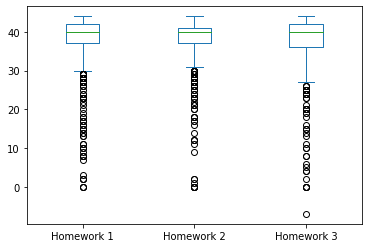

In [783]:
data_copy3[['Homework 1', 'Homework 2', 'Homework 3']].plot(kind='box')
plt.savefig('Homework Boxplots')

#### Histograms 

Below are histograms demonstrating the distribution of letter grades for the final exam for the first three semesters.

In [784]:
from collections import Counter, OrderedDict

<AxesSubplot:xlabel='Letter Grade'>

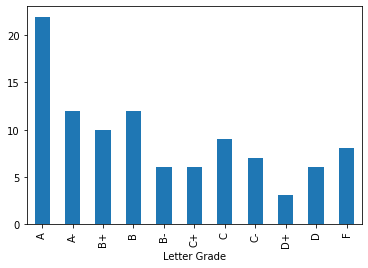

In [919]:
sem1 = data[data['Semester']==1]
sem1 = sem1.groupby('Letter Grade').size()
sem1 = round(sem1/ np.sum(sem1),2) * 100
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem1.loc[letter_order].plot(kind='bar',legend=False)
# np.sum(sem1)

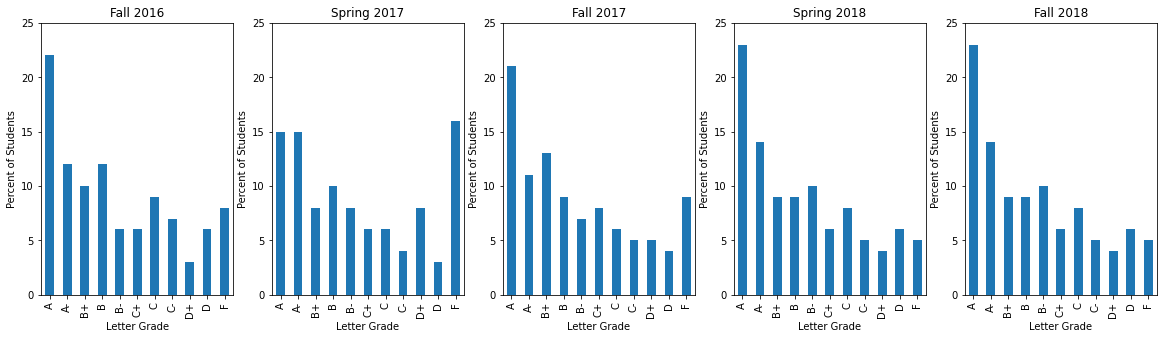

In [923]:
# Consolidated Graph

fig, axes = plt.subplots(1,5, figsize=(20,5))

sem1 = data[data['Semester']==1]
sem1 = sem1.groupby('Letter Grade').size()
sem1 = round(sem1/ np.sum(sem1),2) * 100
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem1.loc[letter_order].plot(kind='bar',legend=False,ax=axes[0])
axes[0].set_xlabel("Letter Grade")
axes[0].set_ylabel("Percent of Students")
axes[0].set_title("Fall 2016")
axes[0].set_ylim((0,25))

sem2 = data[data['Semester']==2]
sem2 = sem2.groupby('Letter Grade').size()
sem2 = round(sem2/ np.sum(sem2),2) * 100
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem2.loc[letter_order].plot(kind='bar',legend=False, ax=axes[1])
axes[1].set_xlabel("Letter Grade")
axes[1].set_ylabel("Percent of Students")
axes[1].set_title("Spring 2017")
axes[1].set_ylim((0,25))

sem3 = data[data['Semester']==3]
sem3 = sem3.groupby('Letter Grade').size()
sem3 = round(sem3/ np.sum(sem3),2) * 100
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem3.loc[letter_order].plot(kind='bar',legend=False, ax=axes[2])
axes[2].set_xlabel("Letter Grade")
axes[2].set_ylabel("Percent of Students")
axes[2].set_title("Fall 2017")
axes[2].set_ylim((0,25))

sem4 = data[data['Semester']==4]
sem4 = sem4.groupby('Letter Grade').size()
sem4 = round(sem4/ np.sum(sem4),2) * 100
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem4.loc[letter_order].plot(kind='bar',legend=False, ax=axes[3])
axes[3].set_xlabel("Letter Grade")
axes[3].set_ylabel("Percent of Students")
axes[3].set_title("Spring 2018")
axes[3].set_ylim((0,25))

sem5 = data[data['Semester']==5]
sem5 = sem5.groupby('Letter Grade').size()
sem5 = round(sem5/ np.sum(sem5),2) * 100
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem4.loc[letter_order].plot(kind='bar',legend=False, ax=axes[4])
axes[4].set_xlabel("Letter Grade")
axes[4].set_ylabel("Percent of Students")
axes[4].set_title("Fall 2018")
axes[4].set_ylim((0,25))


plt.savefig('histograms-percent')




In [900]:
data[data['Semester']==4]

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 12,Quiz Adjustment,Drop Lowest Quiz 1,Drop Lowest Quiz 2,Final Exam,Total Score,Letter Grade,Avg Quiz Score,Fall or Spring,Avg HW Score
203,4,960090,Junwen,3.0,42.0,42.0,42.0,42.0,42.0,150.0,...,47.0,NaN,-35,-35.0,129.0,947.0,A,43.73,Spring,42.00
202,4,102440,Maricruz,3.0,41.0,42.0,41.0,37.0,41.0,150.0,...,35.0,34.7,-21,-27.0,102.0,824.7,B-,34.90,Spring,40.25
201,4,421687,Sezin,5.0,40.0,39.0,32.0,38.0,40.0,150.0,...,NaN,28.2,-21,-22.0,72.0,719.2,C-,29.36,Spring,37.25
200,4,311231,Sujay,1.0,40.0,42.0,40.0,42.0,42.0,150.0,...,22.0,NaN,-6,-11.0,78.0,657.0,D,19.82,Spring,41.00
199,4,812898,Nida,1.0,30.0,40.0,37.0,40.0,24.0,123.6,...,34.0,NaN,0,0.0,114.0,806.6,B-,40.44,Spring,36.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,4,785584,Cana,4.0,39.0,39.0,40.0,39.0,37.0,150.0,...,25.0,NaN,-18,-20.0,114.0,796.0,C+,31.91,Spring,39.25
247,4,823172,Oluyomi,3.0,42.0,39.0,42.0,42.0,42.0,150.0,...,13.0,NaN,0,0.0,114.0,805.0,B-,35.67,Spring,41.25
246,4,189622,Jayraj,3.0,39.0,37.0,31.0,39.0,35.0,150.0,...,38.0,NaN,-5,-8.0,93.0,629.0,D,16.36,Spring,36.50
245,4,268429,Jeong Hwan,4.0,40.0,42.0,35.0,42.0,40.0,26.9,...,41.0,NaN,-24,-30.0,126.0,826.9,B-,44.36,Spring,39.75


In [899]:
data[data['Semester']==5]

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 12,Quiz Adjustment,Drop Lowest Quiz 1,Drop Lowest Quiz 2,Final Exam,Total Score,Letter Grade,Avg Quiz Score,Fall or Spring,Avg HW Score
48,5,289595,Pulkit,7.0,13.0,26.0,25.0,35.0,40.0,150.0,...,32.0,NaN,-13,-17.0,120.0,754.0,C,31.18,Fall,24.75
53,5,804918,Jari,8.0,40.0,42.0,42.0,42.0,42.0,150.0,...,49.0,NaN,-21,-25.0,135.0,974.0,A,43.45,Fall,41.50
52,5,377693,Shubin,4.0,42.0,37.0,42.0,42.0,42.0,150.0,...,15.0,NaN,-15,-37.0,129.0,934.0,A,44.27,Fall,40.75
51,5,573800,Mary-Anna,9.0,40.0,31.0,20.0,16.0,2.0,150.0,...,14.0,NaN,-9,-9.0,84.0,598.0,D,23.55,Fall,26.75
50,5,559737,Tanguy,6.0,39.0,38.0,32.0,39.0,38.0,150.0,...,28.0,NaN,0,-16.0,108.0,778.0,C+,32.20,Fall,37.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,656561,Felipe,3.0,42.0,42.0,41.0,42.0,42.0,150.0,...,38.0,NaN,-31,-36.0,129.0,928.0,A-,42.64,Fall,41.75
98,5,148918,Ayoka,1.0,16.0,39.0,33.0,29.0,40.0,150.0,...,NaN,NaN,0,0.0,87.0,717.0,C-,32.30,Fall,29.25
97,5,511528,Kun Seok,7.0,42.0,39.0,40.0,40.0,42.0,150.0,...,50.0,NaN,0,0.0,129.0,923.0,A-,43.44,Fall,40.25
104,5,760082,Zhuangchen,3.0,42.0,41.0,42.0,38.0,42.0,150.0,...,50.0,NaN,-29,-32.0,123.0,934.0,A,42.36,Fall,40.75


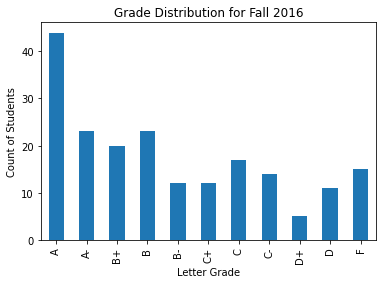

In [785]:
sem1 = data[data['Semester']==1]
sem1 = sem1.groupby('Letter Grade').size()
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem1.loc[letter_order].plot(kind='bar',legend=False)
plt.xlabel("Letter Grade")
plt.ylabel("Count of Students")
plt.title("Grade Distribution for Fall 2016")
plt.savefig('Hist - F16')

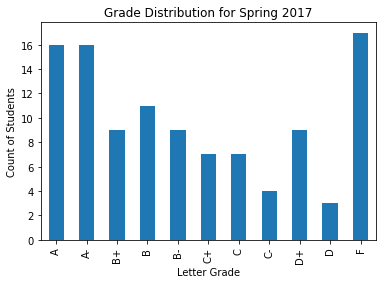

In [786]:
sem2 = data[data['Semester']==2]
sem2 = sem2.groupby('Letter Grade').size()
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem2.loc[letter_order].plot(kind='bar',legend=False)
plt.xlabel("Letter Grade")
plt.ylabel("Count of Students")
plt.title("Grade Distribution for Spring 2017")
plt.savefig('Hist-S17')

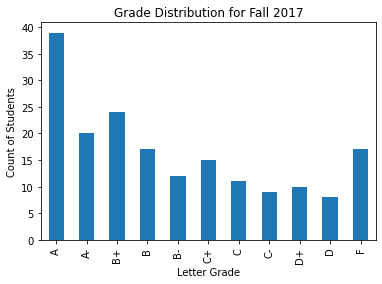

In [787]:
sem3 = data[data['Semester']==3]
sem3 = sem3.groupby('Letter Grade').size()
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem3.loc[letter_order].plot(kind='bar',legend=False)
plt.xlabel("Letter Grade")
plt.ylabel("Count of Students")
plt.title("Grade Distribution for Fall 2017")
plt.savefig('Hist-F17')

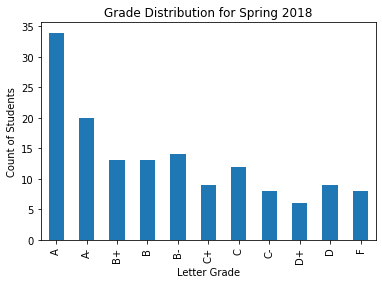

In [788]:
sem4 = data[data['Semester']==4]
sem4 = sem4.groupby('Letter Grade').size()
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem4.loc[letter_order].plot(kind='bar',legend=False)
plt.xlabel("Letter Grade")
plt.ylabel("Count of Students")
plt.title("Grade Distribution for Spring 2018")
plt.savefig('Hist-S18')

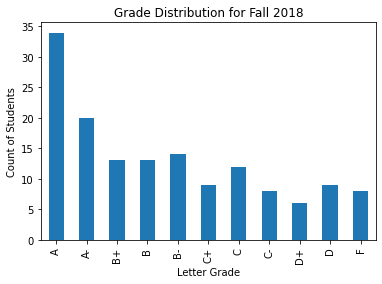

In [789]:
sem5 = data[data['Semester']==5]
sem5 = sem5.groupby('Letter Grade').size()
letter_order = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+','D', 'F']
sem4.loc[letter_order].plot(kind='bar',legend=False)
plt.xlabel("Letter Grade")
plt.ylabel("Count of Students")
plt.title("Grade Distribution for Fall 2018")
plt.savefig('Hist-F18')

#### Scatter Plots

1. Correlation between Average Quiz Score and Total Score (derived)
2. Correlation between Average HW Score and Final Exam Score
3. Correlation between Final Exam Score and Total Score

Text(0.5, 1.0, 'Final Exam Score vs Average Quiz Score by Semester Type')

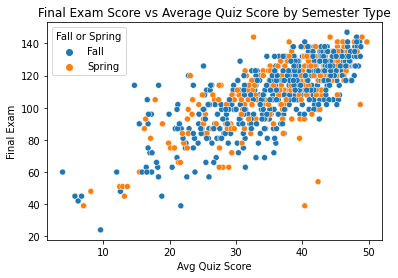

In [843]:
# Derived Attribute 
data['Avg Quiz Score'] = data.apply(lambda row: round(np.mean(row[11:22]),2), axis=1)
data['Fall or Spring'] = np.where(data['Semester'] % 2 == 1, 'Fall',
                         np.where(data['Semester'] % 2 == 0, 'Spring', 'NA'))
sns.scatterplot(data=data, x=data['Avg Quiz Score'], y=data['Final Exam'],hue=data['Fall or Spring'])
plt.title('Final Exam Score vs Average Quiz Score by Semester Type')

# plt.scatter(data['Avg Quiz Score'], data['Final Exam'], c=data['Semester'])
# plt.xlabel('Average Quiz Score')
# plt.ylabel('Final Exam Score')
# plt.title('Final Exam Score vs Average Quiz Score by Semester')


Text(0.5, 1.0, ' Total Score vs Final Exam Score')

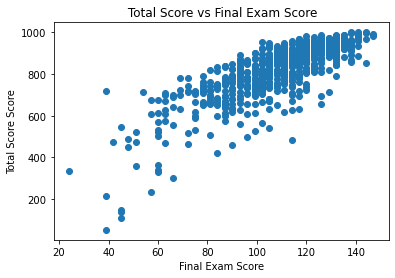

In [814]:
plt.scatter(data['Final Exam'], data['Total Score'])
plt.xlabel('Final Exam Score')
plt.ylabel('Total Score Score')
plt.title(' Total Score vs Final Exam Score')

Text(0.5, 1.0, ' Total Score vs Avg HW Score')

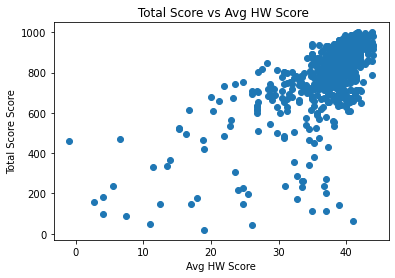

In [852]:
data['Avg HW Score'] = data.apply(lambda row: round(np.mean(row[4:8]),2), axis=1)
plt.scatter(data['Avg HW Score'], data['Total Score'])
plt.xlabel('Avg HW Score')
plt.ylabel('Total Score Score')
plt.title(' Total Score vs Avg HW Score')

/Users/niki/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/niki/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


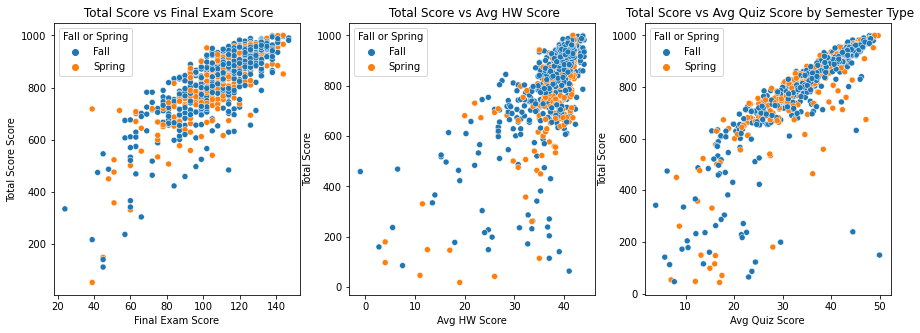

In [924]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(data['Final Exam'], data['Total Score'], ax=ax[0],hue=data['Fall or Spring'])
ax[0].set_xlabel('Final Exam Score')
ax[0].set_ylabel('Total Score Score')
ax[0].set_title(' Total Score vs Final Exam Score')


sns.scatterplot(data['Avg HW Score'], data['Total Score'], ax=ax[1], hue=data['Fall or Spring'])
ax[1].set_xlabel('Avg HW Score')
ax[1].set_ylabel('Total Score')
ax[1].set_title(' Total Score vs Avg HW Score')

sns.scatterplot(x=data['Avg Quiz Score'], y=data['Total Score'],hue=data['Fall or Spring'], ax=ax[2])
ax[2].set_xlabel('Avg Quiz Score')
ax[2].set_ylabel('Total Score')
ax[2].set_title(' Total Score vs Avg Quiz Score by Semester Type')

plt.savefig('scatterplots-updated')


In [926]:
data_copy3.to_csv('hw1-dataset.csv')